In [2]:
import sender_reciever_1v1comms as sr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(columns=["Game", "Start Sender Amount", "Start Receiver Amount", "Amount Sent By Sender", "Amount Sent By Receiver", "Final Sender Amount", "Final Receiver Amount", "Sender Promise", "Receiver Promise"])
s_wins = 0
r_wins = 0
ties = 0
game_fails = 0
rounds = 10
for i in range(50):
    try:
        result = sr.run_game(100, i+1, df, rounds)
        if result == 1:
            s_wins += 1
        elif result == -1:
            r_wins += 1
        else:
            ties += 1
    except Exception as e:
        print(f"Error in game {i+1}: {e}")
        game_fails += 1
        
    print(df)
    
df.to_csv("sr_games_100m_10r.csv", index=False)


=== Game 1 ===
Round 1:
Sender's account: 100, Receiver's account: 0
Sender:  I will send you $10 in this round, hoping that we can both maximize our winnings and succeed in the remaining 9 rounds.
Amount sent by sender: 50, Amount sent back by receiver: 30
Receiver:  "I will consider sending a significant amount of money back in this round to increase our chances for a joint win in the upcoming rounds, but I also need to ensure I have enough for future strategic decisions."
Sender's account: 80, Receiver's account: 70


Round 2:
Sender's account: 80, Receiver's account: 70
Sender:  I will strategically send a significant portion of my money now to maximize our chances for a joint win in the upcoming rounds, but I'll keep enough for future strategic decisions.
Amount sent by sender: 50, Amount sent back by receiver: 30
Receiver:  I will consider sending a large portion of this doubled amount back to you now, as a strategic move for our mutual success in the upcoming rounds, while keep

In [4]:
df

,Game,Start Sender Amount,Start Receiver Amount,Amount Sent By Sender,Amount Sent By Receiver,Final Sender Amount,Final Receiver Amount
1,1.0,100.0,0.0,50.0,50.0,100.0,50.0
2,1.0,100.0,50.0,40.0,20.0,80.0,110.0
3,1.0,80.0,110.0,56.0,32.0,56.0,190.0
4,1.0,56.0,190.0,28.0,13.0,41.0,233.0
5,1.0,41.0,233.0,10.0,0.0,31.0,253.0
...,...,...,...,...,...,...,...
996,100.0,70.0,230.0,50.0,50.0,70.0,280.0
997,100.0,70.0,280.0,15.0,10.0,65.0,300.0
998,100.0,65.0,300.0,20.0,10.0,55.0,330.0
999,100.0,55.0,330.0,27.0,29.0,57.0,355.0


In [6]:
print("Sender wins:", s_wins, "Receiver wins:", r_wins, "Ties:", ties, "Game fails:", game_fails)

Sender wins: 0 Receiver wins: 100 Ties: 0 Game fails: 0


In [7]:
df = pd.read_csv("sr_games_100m_10r.csv")
df

,Game,Start Sender Amount,Start Receiver Amount,Amount Sent By Sender,Amount Sent By Receiver,Final Sender Amount,Final Receiver Amount,Sender Promise,Receiver Promise
0,1,100,0,50,30,80,70,"I will send you $10 in this round, hoping that...","""I will consider sending a significant amount ..."
1,1,80,70,50,30,60,140,I will strategically send a significant portio...,I will consider sending a large portion of thi...
2,1,60,140,25,10,45,180,I'll send a large amount of money this round t...,I will carefully consider my moves and strateg...
3,1,45,180,27,15,33,219,I will strategically send a significant portio...,"""I will prioritize sending a strategic amount ..."
4,1,33,219,30,12,15,267,I'll send a strategic amount of money this rou...,I will consider sending a strategic amount of ...
...,...,...,...,...,...,...,...,...,...
489,50,30,210,15,10,25,230,"I'll send you a large amount this round, hopin...",I will be sending a calculated amount back thi...
490,50,25,230,7,3,21,241,"I'll send a strategic amount this round, hopin...",I will consider sending a substantial amount b...
491,50,21,241,7,4,18,251,I'll send a significant portion of my money th...,"""I will consider sending a larger amount this ..."
492,50,18,251,5,7,20,254,I will strategically send a smaller amount thi...,"I will send you a strategic amount next round,..."


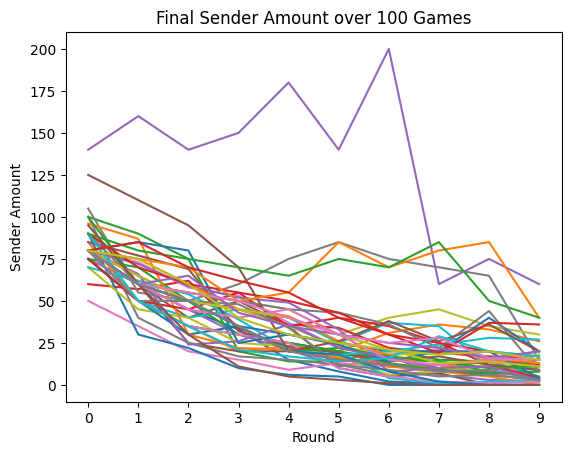

Total games plotted: 49


In [18]:
j=0
k=0
games = 0
for i in range(1, 51):
    while k < len(df) and df.iloc[k]["Game"] == i:
        k += 1
    j = k - 10
    if df.iloc[j]["Game"] != i:
        pass
    else:
        new_df = df.iloc[j:k]
        games += 1
        new_df = new_df.reset_index(drop=True)
        plt.plot(new_df["Final Sender Amount"])
        plt.xticks(range(10))
    k += 1
plt.title("Final Sender Amount over 100 Games")
plt.xlabel("Round")
plt.ylabel("Sender Amount")
plt.show()
print("Total games plotted:", games)

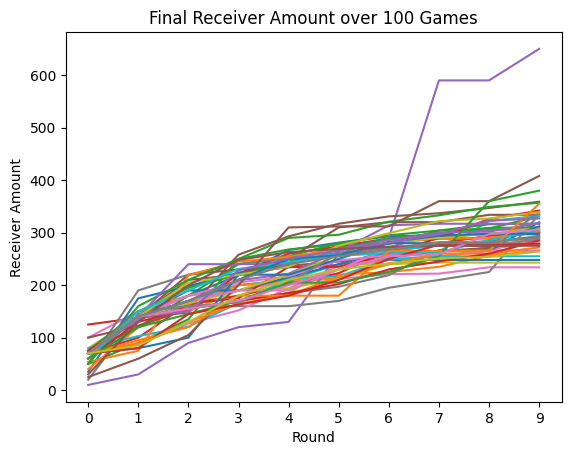

Total games plotted: 49


In [16]:
j=0
k=0
games = 0
for i in range(1, 51):
    while k < len(df) and df.iloc[k]["Game"] == i:
        k += 1
    j = k - 10
    if df.iloc[j]["Game"] != i:
        pass
    else:
        new_df = df.iloc[j:k]
        games+=1
        new_df = new_df.reset_index(drop=True)
        plt.plot(new_df["Final Receiver Amount"])
        plt.xticks(range(10))
    k += 1
plt.title("Final Receiver Amount over 100 Games")
plt.xlabel("Round")
plt.ylabel("Receiver Amount")
plt.show()
print("Total games plotted:", games)

In [15]:
j=0
k=0
s_wins = 0
r_wins = 0
ties = 0
for i in range(1, 51):
    while k < len(df) and df.iloc[k]["Game"] == i:
        k += 1
    j = k - 10
    if df.iloc[j]["Game"] != i:
        pass
    else:
        if df.iloc[k]["Final Sender Amount"] > df.iloc[k]["Final Receiver Amount"]:
            print("Sender wins game", i)
            s_wins += 1
        elif df.iloc[k]["Final Sender Amount"] < df.iloc[k]["Final Receiver Amount"]:
            print("Receiver wins game", i)
            r_wins += 1
        else:
            ties += 1
    if k < len(df)-1:
        k += 1
print("Sender wins:", s_wins, "Receiver wins:", r_wins, "Ties:", ties)

Sender wins game 1
Sender wins game 2
Receiver wins game 3
Sender wins game 5
Receiver wins game 6
Sender wins game 7
Sender wins game 8
Sender wins game 10
Sender wins game 11
Sender wins game 13
Sender wins game 14
Sender wins game 17
Sender wins game 18
Receiver wins game 19
Receiver wins game 20
Sender wins game 22
Sender wins game 25
Receiver wins game 26
Sender wins game 27
Sender wins game 28
Sender wins game 29
Sender wins game 30
Sender wins game 31
Sender wins game 32
Sender wins game 33
Sender wins game 34
Sender wins game 35
Sender wins game 36
Sender wins game 37
Sender wins game 38
Sender wins game 39
Sender wins game 40
Sender wins game 41
Sender wins game 42
Sender wins game 43
Sender wins game 44
Sender wins game 45
Sender wins game 46
Sender wins game 47
Sender wins game 48
Sender wins game 49


IndexError: single positional indexer is out-of-bounds

In [19]:
np.mean(df["Amount Sent By Sender"])

NameError: name 'np' is not defined